# What does your voice look like?

🎤 Recording for 5 seconds... Speak now!
✅ Recording complete!
This is your voice
Mel Spectogram


/Users/elsa/miniconda3/envs/py311env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Spectogram


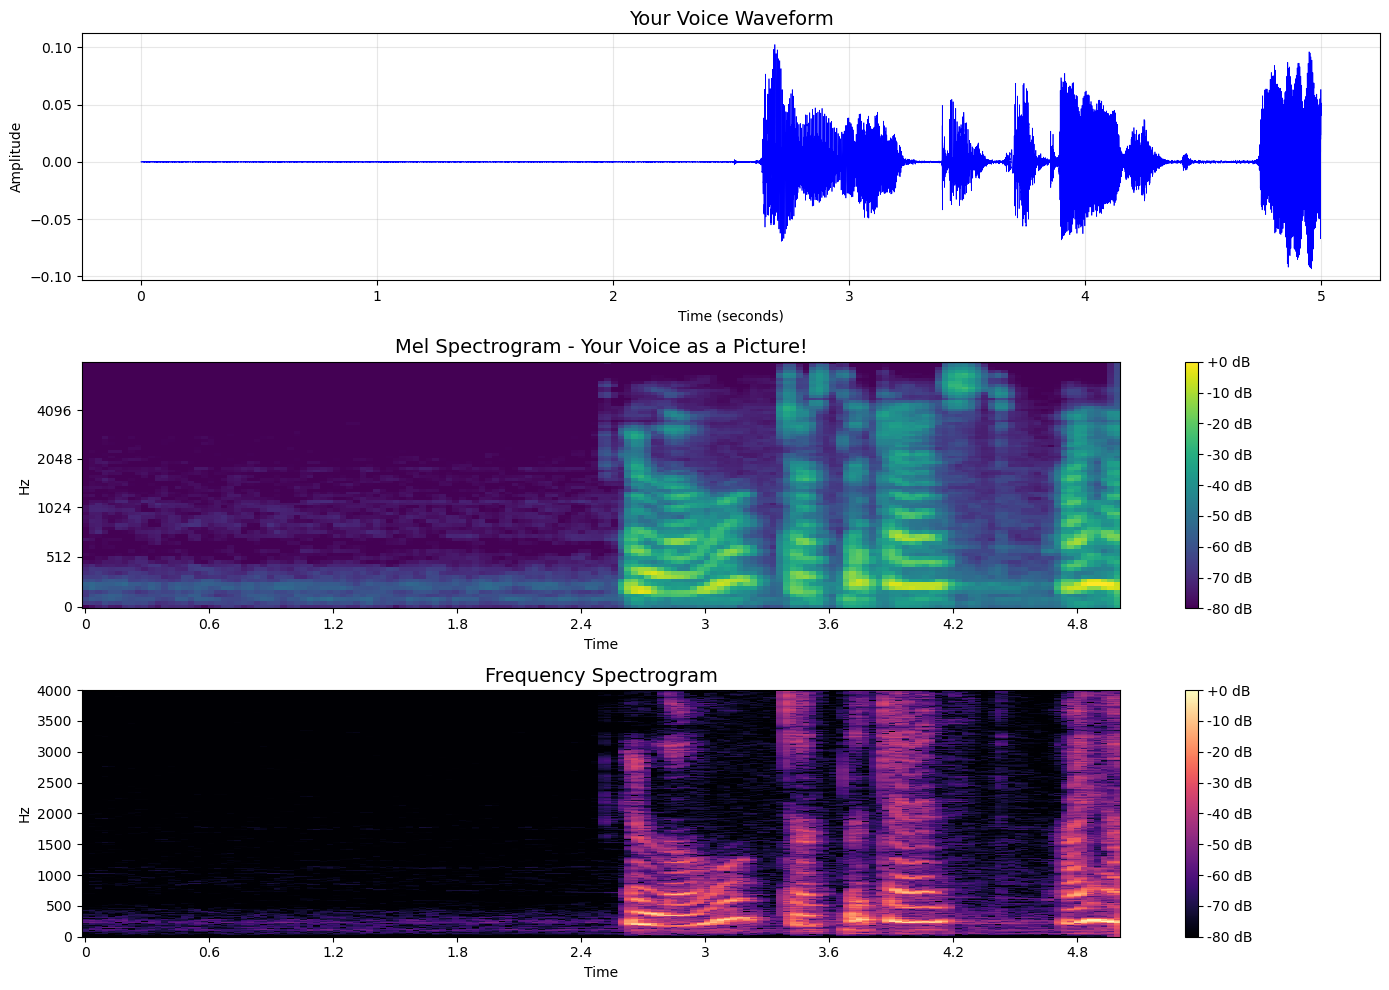

In [1]:
import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

duration = 5  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak now!")
audio = sd.rec(int(duration * sample_rate), 
               samplerate=sample_rate, 
               channels=1, 
               dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")


print("This is your voice")
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

time = np.linspace(0, len(audio) / sample_rate, len(audio))
axes[0].plot(time, audio, color='blue', linewidth=0.5)
axes[0].set_title('Your Voice Waveform', fontsize=14)
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

print("Mel Spectogram") 
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=80)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_spec_db, sr=sample_rate, 
                                x_axis='time', y_axis='mel', 
                                ax=axes[1], cmap='viridis')
axes[1].set_title('Mel Spectrogram - Your Voice as a Picture!', fontsize=14)
plt.colorbar(img, ax=axes[1], format='%+2.0f dB')

print("Spectogram") 
D = librosa.stft(audio)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img2 = librosa.display.specshow(D_db, sr=sample_rate, 
                                 x_axis='time', y_axis='hz', 
                                 ax=axes[2], cmap='magma')
axes[2].set_title('Frequency Spectrogram', fontsize=14)
axes[2].set_ylim(0, 4000)  # Focus on speech frequencies
plt.colorbar(img2, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Whisper API

In [3]:
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
import os
from IPython.display import Audio, display
from dotenv import load_dotenv
from pathlib import Path

env_path = Path.cwd().parent / ".env"
load_dotenv(dotenv_path=env_path)

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

duration = 5  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak now!")
audio = sd.rec(int(duration * sample_rate), 
               samplerate=sample_rate, 
               channels=1, 
               dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")


audio_int16 = np.int16(audio * 32767)

# Create in-memory WAV file
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"  # Whisper needs a filename

# Transcribe with Whisper
print("🤖 Transcribing with Whisper...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer
)

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)

🎤 Recording for 5 seconds... Speak now!
✅ Recording complete!
🤖 Transcribing with Whisper...

📝 Transcription:
----------------------------------------
Hello, this is another test, let's see what comes up.


# Super Power: Context

In [4]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
from IPython.display import Audio, display, Markdown

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Display a 30-second reading text
reading_text = """
**Read this text aloud (about 30 seconds):**

The researchers' analyses of the wind farm data showed variable wind patterns. The project 
lead will lead the team through complex permit processes. They must present the present 
findings to investors. The 3 million contract includes clauses for force majeure 
events. Dr. García-Smith's team discovered that the enzyme's pH of 7.2 was optimal. The 
AI learned to differentiate between "read" (present) and "read" (past), processing live 
feeds versus archived content. The baroque bass player stood close to the entrance, too 
close to record properly.
"""

display(Markdown(reading_text))

# Record for 30 seconds
duration = 45
sample_rate = 16000

print(f"\n🎤 Recording for {duration} seconds... Start reading now!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

display(Audio(audio, rate=sample_rate))


# Prepare audio
audio_int16 = np.int16(audio * 32767)
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"

# Transcribe without context prompt
print("🤖 Transcribing without context...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
)

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)


**Read this text aloud (about 30 seconds):**

The researchers' analyses of the wind farm data showed variable wind patterns. The project 
lead will lead the team through complex permit processes. They must present the present 
findings to investors. The 3 million contract includes clauses for force majeure 
events. Dr. García-Smith's team discovered that the enzyme's pH of 7.2 was optimal. The 
AI learned to differentiate between "read" (present) and "read" (past), processing live 
feeds versus archived content. The baroque bass player stood close to the entrance, too 
close to record properly.



🎤 Recording for 45 seconds... Start reading now!
✅ Recording complete!


🤖 Transcribing without context...

📝 Transcription:
----------------------------------------
I need to read this text. The researcher's analysis of the wind farm data showed variable wind patterns. The project lead will lead the team through complex permit processes. They must present the present findings to investors. The 3 million contract includes clauses for force majeure events. Dr. Garcia-Smith's team discovered that the enzyme's pH of 7.2 was optimal. The AI learned to differentiate between read present and read past, processing live feeds versus archived content.


In [5]:

# Transcribe with context prompt
print("🤖 Transcribing with context...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
    prompt = "heteronyms, homographs, lead metal, wind turbine, present tense, past tense read, pH levels, enzyme, García-Smith, force majeure, baroque, bass instrument, differentiate")

print("\n📝 Transcription:")
print("-" * 40)
print(transcript.text)

🤖 Transcribing with context...

📝 Transcription:
----------------------------------------
I need to read this text. The researchers' analysis of the wind farm data showed variable wind patterns. The project lead will lead the team through complex permit processes. They must present the present findings to investors. The 3 million contract includes clauses for force majeure events. Dr. García-Smith's team discovered that the enzyme's pH of 7.2 was optimal. The AI learned to differentiate between read, present, and read, past, processing live feeds versus archived content.



# Chunking

In [6]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Record longer audio
duration = 15  # seconds total
sample_rate = 16000
chunk_duration = 5  # seconds per chunk

print(f"🎤 Recording for {duration} seconds... Speak continuously!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

display(Audio(audio, rate=sample_rate))


# Split audio into chunks
chunk_size = chunk_duration * sample_rate
chunks = [audio[i:i+chunk_size] for i in range(0, len(audio), chunk_size)]

print(f"\n🔪 Split into {len(chunks)} chunks")

# Transcribe each chunk
all_transcripts = []

for i, chunk in enumerate(chunks):
    print(f"\n🤖 Transcribing chunk {i+1}/{len(chunks)}...")
    
    # Prepare chunk buffer
    chunk_int16 = np.int16(chunk * 32767)
    buffer = io.BytesIO()
    wavfile.write(buffer, sample_rate, chunk_int16)
    buffer.seek(0)
    buffer.name = f"chunk_{i}.wav"
    
    # Transcribe
    transcript = client.audio.transcriptions.create(
        model="whisper-1",
        file=buffer
    )
    
    all_transcripts.append(transcript.text)
    print(f"Chunk {i+1}: {transcript.text}")

# Combine all transcripts
print("\n📝 Complete Transcription:")
print("-" * 40)
full_text = " ".join(all_transcripts)
print(full_text)

🎤 Recording for 15 seconds... Speak continuously!
✅ Recording complete!



🔪 Split into 3 chunks

🤖 Transcribing chunk 1/3...
Chunk 1: . 

🤖 Transcribing chunk 2/3...
Chunk 2: Thank you.

🤖 Transcribing chunk 3/3...
Chunk 3: This is another test while the audio recording is ongoing.

📝 Complete Transcription:
----------------------------------------
.  Thank you. This is another test while the audio recording is ongoing.


# Time Stamps

In [7]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
from openai import OpenAI
import io
from IPython.display import Audio, display

#client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

duration = 10  # seconds
sample_rate = 16000

print(f"🎤 Recording for {duration} seconds... Speak with pauses!")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("✅ Recording complete!")

# Play back
display(Audio(audio, rate=sample_rate))

# Prepare audio
audio_int16 = np.int16(audio * 32767)
buffer = io.BytesIO()
wavfile.write(buffer, sample_rate, audio_int16)
buffer.seek(0)
buffer.name = "recording.wav"

# Get detailed transcription with timestamps
print("\n🤖 Transcribing with timestamps...")
transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=buffer,
    response_format="verbose_json",
    timestamp_granularities=["segment", "word"]  # Get both segment and word timestamps
)

# Display formatted timestamps
print("\n📝 Transcription with timestamps:")
print("-" * 40)

# Show segments with timestamps
if hasattr(transcript, 'segments'):
    for segment in transcript.segments:
        start = segment.start
        end = segment.end
        text = segment.text
        print(f"\n[{start:.2f}s - {end:.2f}s]")
        print(f"  {text}")

# Show word-level timestamps if available
if hasattr(transcript, 'words'):
    print("\n🔤 Word-level timing:")
    print("-" * 40)
    for word in transcript.words:
        word_text = word.word
        start = word.start
        end = word.end
        print(f"{word_text:15} [{start:.2f}s - {end:.2f}s]")

# Full text and metadata
print("\n📄 Full text:")
print(transcript.text)

print(f"\n🌍 Language detected: {transcript.language}")
print(f"⏱️ Total duration: {transcript.duration:.2f}s")

🎤 Recording for 10 seconds... Speak with pauses!
✅ Recording complete!



🤖 Transcribing with timestamps...

📝 Transcription with timestamps:
----------------------------------------

[2.46s - 6.68s]
   Another test, recording for 15 seconds.

[7.94s - 9.12s]
   The clue is...

🔤 Word-level timing:
----------------------------------------
Another         [2.46s - 3.54s]
test            [3.54s - 4.02s]
recording       [4.10s - 4.76s]
for             [4.76s - 5.68s]
15              [5.68s - 6.14s]
seconds         [6.14s - 6.68s]
The             [7.94s - 8.30s]
clue            [8.30s - 8.42s]
is              [8.42s - 9.12s]

📄 Full text:
Another test, recording for 15 seconds. The clue is...

🌍 Language detected: english
⏱️ Total duration: 10.00s


In [9]:
audio_path = Path("audio/CA138clip.mp3")

with open(audio_path, "rb") as audio_file:
    transcript = client.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file,
        response_format="verbose_json"
    )

# Output results
print("📝 Transcribed text:")
print(transcript.text)

print("\n🌍 Detected language:")
print(transcript.language)

print("\n⏱️ Audio duration (seconds):")
print(transcript.duration)

📝 Transcribed text:
It was rather interesting just to watch them gathering their materials and bouncing around their, what they call it, kangaroo walk or something like that. Who named it that? I don't know. I bet those men are going to get quite a reception when they get back to Maine. Oh, yes. I'll be so glad when they land back now. But I think that's pretty well a fact, because they've landed so many safely now that I feel relieved. Just getting off of the moon was the thing that was. Have they met with the one that was circling? Yes, they've rendezvoused. So I understand. That wasn't shown either, but they say they have rendezvoused. So that's a matter of making the circles and then coming down. What do you sort of imagine for the future? Do you imagine them sending up ships? I think they will. I think they will do some more exploring up there. Very positive. Because that was such a very small area, when you think of it, that they just gathered rocks and samples of soil and all. A

In [10]:
from datetime import datetime
import json

# 2) Output folder
out_dir = Path("outputs")
out_dir.mkdir(exist_ok=True)


# 3) Prompt with meeting context (edit to match your scenario)
prompt = (
    "Informal conversation about a Moon mission, astronauts, orbital rendezvous, and future space exploration."
    "Please transcribe exactly what is said (no summarizing)."
)

def transcribe(audio_path: Path, prompt_text: str | None = None):
    """Transcribe audio with optional prompt. Returns the API response object."""
    with open(audio_path, "rb") as f:
        kwargs = dict(
            model="whisper-1",
            file=f,
            response_format="verbose_json"
        )
        if prompt_text:
            kwargs["prompt"] = prompt_text

        return client.audio.transcriptions.create(**kwargs)

def to_dict(transcript_obj):
    """
    Convert response to a JSON-serializable dict.
    Works whether the SDK returns a pydantic-like object or plain dict.
    """
    if hasattr(transcript_obj, "model_dump"):
        return transcript_obj.model_dump()
    if hasattr(transcript_obj, "dict"):
        return transcript_obj.dict()
    return transcript_obj

# 4) Run both transcriptions
unguided = transcribe(audio_path, prompt_text=None)
guided = transcribe(audio_path, prompt_text=prompt)

# 5) Compare (quick, visible)
print("\n=== UNGUIDED (no prompt) ===\n")
print(unguided.text)

print("\n=== GUIDED (with prompt) ===\n")
print(guided.text)

# 6) Save results
stamp = datetime.now().strftime("%Y%m%d_%H%M%S")
base_name = audio_path.stem

unguided_path = out_dir / f"{base_name}_unguided_{stamp}.json"
guided_path = out_dir / f"{base_name}_guided_{stamp}.json"

with open(unguided_path, "w", encoding="utf-8") as f:
    json.dump(to_dict(unguided), f, ensure_ascii=False, indent=2)

with open(guided_path, "w", encoding="utf-8") as f:
    json.dump(to_dict(guided), f, ensure_ascii=False, indent=2)

print("\n✅ Saved outputs:")
print(f"- Unguided: {unguided_path}")
print(f"- Guided:   {guided_path}")


=== UNGUIDED (no prompt) ===

It was rather interesting just to watch them gathering their materials and bouncing around their, what they call it, kangaroo walk or something like that. Who named it that? I don't know. I bet those men are going to get quite a reception when they get back to Maine. Oh, yes. I'll be so glad when they land back now. But I think that's pretty well a fact, because they've landed so many safely now that I feel relieved. Just getting off of the moon was the thing that was. Have they met with the one that was circling? Yes, they've rendezvoused. So I understand. That wasn't shown either, but they say they have rendezvoused. So that's a matter of making the circles and then coming down. What do you sort of imagine for the future? Do you imagine them sending up ships? I think they will. I think they will do some more exploring up there. Very positive. Because that was such a very small area, when you think of it, that they just gathered rocks and samples of soil

In [11]:
from pydub import AudioSegment

def chunk_mp3_to_wav(
    input_path: str | Path,
    out_dir: str | Path = "audio_chunks",
    chunk_seconds: int = 30,   # use 30s so you see multiple chunks from 86s
):
    input_path = Path(input_path)
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    if not input_path.exists():
        raise FileNotFoundError(f"Audio file not found: {input_path.resolve()}")

    audio = AudioSegment.from_file(input_path)  # reads mp3
    total_ms = len(audio)
    chunk_ms = chunk_seconds * 1000

    chunk_paths = []
    chunk_offsets = []  # seconds

    for i, start_ms in enumerate(range(0, total_ms, chunk_ms)):
        end_ms = min(start_ms + chunk_ms, total_ms)
        chunk = audio[start_ms:end_ms]

        chunk_path = out_dir / f"{input_path.stem}_chunk_{i:03d}.wav"
        chunk.export(chunk_path, format="wav")  # WAV is easiest to re-open/verify

        chunk_paths.append(chunk_path)
        chunk_offsets.append(start_ms / 1000)

        print(f"✅ {chunk_path.name} | start={start_ms/1000:.2f}s end={end_ms/1000:.2f}s")

    return chunk_paths, chunk_offsets


# Example usage
chunk_paths, chunk_offsets = chunk_mp3_to_wav(
    input_path=audio_path,
    out_dir="audio_chunks",
    chunk_seconds=30
)
print("\nChunks:", len(chunk_paths))
print("Offsets (s):", chunk_offsets)


from pathlib import Path
import scipy.io.wavfile as wavfile

chunks = sorted(Path("audio_chunks").glob("*.wav"))
print("Found chunks:", len(chunks))

for p in chunks:
    sr, data = wavfile.read(str(p))
    dur = data.shape[0] / sr
    print(f"{p.name:35} sr={sr} duration={dur:.2f}s")

✅ CA138clip_chunk_000.wav | start=0.00s end=30.00s
✅ CA138clip_chunk_001.wav | start=30.00s end=60.00s
✅ CA138clip_chunk_002.wav | start=60.00s end=86.20s

Chunks: 3
Offsets (s): [0.0, 30.0, 60.0]
Found chunks: 3
CA138clip_chunk_000.wav             sr=44100 duration=30.00s
CA138clip_chunk_001.wav             sr=44100 duration=30.00s
CA138clip_chunk_002.wav             sr=44100 duration=26.20s


In [13]:
import math
# ---------- Step 6: Chunk MP3 into WAVs ----------
def chunk_mp3_to_wav(
    input_path: str | Path,
    out_dir: str | Path = "audio_chunks",
    chunk_seconds: int = 30,  # use 30s so you see multiple chunks from 86s
):
    input_path = Path(input_path)
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    if not input_path.exists():
        raise FileNotFoundError(f"Audio file not found: {input_path.resolve()}")

    audio = AudioSegment.from_file(input_path)  # reads mp3
    total_ms = len(audio)
    chunk_ms = chunk_seconds * 1000

    chunk_paths = []
    chunk_offsets = []  # seconds

    for i, start_ms in enumerate(range(0, total_ms, chunk_ms)):
        end_ms = min(start_ms + chunk_ms, total_ms)
        chunk = audio[start_ms:end_ms]

        chunk_path = out_dir / f"{input_path.stem}_chunk_{i:03d}.wav"
        chunk.export(chunk_path, format="wav")

        chunk_paths.append(chunk_path)
        chunk_offsets.append(start_ms / 1000.0)

        print(f"✅ {chunk_path.name} | start={start_ms/1000:.2f}s end={end_ms/1000:.2f}s")

    return chunk_paths, chunk_offsets


# ---------- Step 7: Transcribe chunks + timestamps ----------
def format_hhmmss(seconds: float) -> str:
    s = int(seconds)
    hh = s // 3600
    mm = (s % 3600) // 60
    ss = s % 60
    return f"{hh:02d}:{mm:02d}:{ss:02d}"

def transcribe_chunk(chunk_path: Path):
    """
    Returns verbose_json transcription including segment timestamps.
    """
    with open(chunk_path, "rb") as f:
        return client.audio.transcriptions.create(
            model="whisper-1",
            file=f,
            response_format="verbose_json",
            timestamp_granularities=["segment"],  # segment timestamps for combining
        )

def transcribe_chunks_with_global_timestamps(chunk_paths, chunk_offsets):
    """
    1) Transcribe each chunk
    2) Add chunk offset to segment timestamps (global timeline)
    3) Combine all segments, sorted by start time
    """
    merged_segments = []

    for chunk_path, offset_s in zip(chunk_paths, chunk_offsets):
        print(f"\n🤖 Transcribing {chunk_path.name} (offset={offset_s:.2f}s)")
        t = transcribe_chunk(chunk_path)

        # Depending on SDK version, segments may be attribute or dict.
        segments = t.segments if hasattr(t, "segments") else t.get("segments", [])

        for seg in segments:
            # seg may be object-like or dict-like
            seg_start = float(seg.start) if hasattr(seg, "start") else float(seg["start"])
            seg_end = float(seg.end) if hasattr(seg, "end") else float(seg["end"])
            seg_text = seg.text if hasattr(seg, "text") else seg["text"]

            merged_segments.append(
                {
                    "start": seg_start + offset_s,
                    "end": seg_end + offset_s,
                    "start_hhmmss": format_hhmmss(seg_start + offset_s),
                    "end_hhmmss": format_hhmmss(seg_end + offset_s),
                    "text": seg_text.strip(),
                    "chunk_file": chunk_path.name,
                    "chunk_offset_s": offset_s,
                }
            )

    merged_segments.sort(key=lambda x: x["start"])
    return merged_segments


def export_with_timestamps(merged_segments, out_txt: Path, out_json: Path):
    """
    Export:
      - JSON: all segments with global timestamps
      - TXT: human-readable timestamps per line
    """
    out_txt.parent.mkdir(parents=True, exist_ok=True)

    with open(out_json, "w", encoding="utf-8") as f:
        json.dump(merged_segments, f, ensure_ascii=False, indent=2)

    with open(out_txt, "w", encoding="utf-8") as f:
        for seg in merged_segments:
            f.write(f"[{seg['start_hhmmss']} - {seg['end_hhmmss']}] {seg['text']}\n")

    print("\n✅ Exported:")
    print(f"- {out_json}")
    print(f"- {out_txt}")


# ---------- Example usage (Step 6 + Step 7) ----------
audio_path = Path("audio/CA138clip.mp3") 

# Step 6: chunk
chunk_paths, chunk_offsets = chunk_mp3_to_wav(
    input_path=audio_path,
    out_dir="audio_chunks",
    chunk_seconds=30
)
print("\nChunks:", len(chunk_paths))
print("Offsets (s):", chunk_offsets)

# Checkpoint: verify chunks
chunks = sorted(Path("audio_chunks").glob("*.wav"))
print("\nFound chunks:", len(chunks))
for p in chunks:
    sr, data = wavfile.read(str(p))
    dur = data.shape[0] / sr
    print(f"{p.name:35} sr={sr} duration={dur:.2f}s")

# Step 7: transcribe + combine with global timestamps
merged_segments = transcribe_chunks_with_global_timestamps(chunk_paths, chunk_offsets)

print("\n🧾 Combined transcript (first 10 segments):")
for seg in merged_segments[:10]:
    print(f"[{seg['start_hhmmss']} - {seg['end_hhmmss']}] {seg['text']}")

def normalize_segments(segments):
    """
    Keep only fields needed for exports + make sure text is clean.
    """
    cleaned = []
    for seg in segments:
        start = float(seg["start"])
        end = float(seg["end"])
        text = (seg.get("text") or "").strip()
        if not text:
            continue
        cleaned.append({"start": start, "end": end, "text": text})
    cleaned.sort(key=lambda x: x["start"])
    return cleaned


# ---------- Timestamp helpers ----------
def hhmmss(seconds: float) -> str:
    s = max(0, int(seconds))
    hh = s // 3600
    mm = (s % 3600) // 60
    ss = s % 60
    return f"{hh:02d}:{mm:02d}:{ss:02d}"

def srt_time(seconds: float) -> str:
    """
    SRT time format: HH:MM:SS,mmm
    """
    seconds = max(0.0, float(seconds))
    hh = int(seconds // 3600)
    mm = int((seconds % 3600) // 60)
    ss = int(seconds % 60)
    mmm = int(round((seconds - math.floor(seconds)) * 1000))
    if mmm == 1000:
        # handle rounding edge case
        ss += 1
        mmm = 0
        if ss == 60:
            ss = 0
            mm += 1
            if mm == 60:
                mm = 0
                hh += 1
    return f"{hh:02d}:{mm:02d}:{ss:02d},{mmm:03d}"


# ---------- Exporters ----------
def export_txt_with_timestamps(segments, out_path: str | Path):
    """
    Human-readable text:
    [HH:MM:SS - HH:MM:SS] text
    """
    out_path = Path(out_path)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    segs = normalize_segments(segments)

    with open(out_path, "w", encoding="utf-8") as f:
        for seg in segs:
            f.write(f"[{hhmmss(seg['start'])} - {hhmmss(seg['end'])}] {seg['text']}\n")

    return out_path

def export_json(segments, out_path: str | Path):
    """
    Machine-readable JSON: list of {start, end, text}
    """
    out_path = Path(out_path)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    segs = normalize_segments(segments)

    with open(out_path, "w", encoding="utf-8") as f:
        json.dump(segs, f, ensure_ascii=False, indent=2)

    return out_path

def export_srt(segments, out_path: str | Path):
    """
    Standard SRT subtitles.
    """
    out_path = Path(out_path)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    segs = normalize_segments(segments)

    with open(out_path, "w", encoding="utf-8") as f:
        for i, seg in enumerate(segs, start=1):
            start = srt_time(seg["start"])
            end = srt_time(seg["end"])
            text = seg["text"]

            f.write(f"{i}\n")
            f.write(f"{start} --> {end}\n")
            f.write(f"{text}\n\n")

    return out_path

# ---------- Step 8: Run exports ----------
# Example:
# out_dir = Path("outputs")
# base = "my_audio"  # or audio_path.stem

def export_all_formats(merged_segments, out_dir: str | Path, base_name: str):
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    txt_path = export_txt_with_timestamps(merged_segments, out_dir / f"{base_name}_timestamped.txt")
    json_path = export_json(merged_segments, out_dir / f"{base_name}_segments.json")
    srt_path = export_srt(merged_segments, out_dir / f"{base_name}.srt")

    print("✅ Exports created:")
    print(f"- TXT:  {txt_path}")
    print(f"- JSON: {json_path}")
    print(f"- SRT:  {srt_path}")

    return txt_path, json_path, srt_path

# Step 7: transcribe + combine with global timestamps
export_all_formats(merged_segments, out_dir="outputs", base_name=audio_path.stem)

out_dir = Path("outputs")
for p in sorted(out_dir.glob("*")):
    print(p.name)

# Peek first few lines of the TXT and SRT
txt_file = next(out_dir.glob("*_timestamped.txt"), None)
srt_file = next(out_dir.glob("*.srt"), None)

if txt_file:
    print("\n--- TXT preview ---")
    print("\n".join(txt_file.read_text(encoding="utf-8").splitlines()[:5]))

if srt_file:
    print("\n--- SRT preview ---")
    print("\n".join(srt_file.read_text(encoding="utf-8").splitlines()[:12]))


✅ CA138clip_chunk_000.wav | start=0.00s end=30.00s
✅ CA138clip_chunk_001.wav | start=30.00s end=60.00s
✅ CA138clip_chunk_002.wav | start=60.00s end=86.20s

Chunks: 3
Offsets (s): [0.0, 30.0, 60.0]

Found chunks: 3
CA138clip_chunk_000.wav             sr=44100 duration=30.00s
CA138clip_chunk_001.wav             sr=44100 duration=30.00s
CA138clip_chunk_002.wav             sr=44100 duration=26.20s

🤖 Transcribing CA138clip_chunk_000.wav (offset=0.00s)

🤖 Transcribing CA138clip_chunk_001.wav (offset=30.00s)

🤖 Transcribing CA138clip_chunk_002.wav (offset=60.00s)

🧾 Combined transcript (first 10 segments):
[00:00:00 - 00:00:03] It was rather interesting just to watch them gathering
[00:00:03 - 00:00:08] their materials and bouncing around their, what they call it,
[00:00:08 - 00:00:12] kangaroo walk or something like that.
[00:00:12 - 00:00:13] Who named it that?
[00:00:13 - 00:00:15] I don't know.
[00:00:15 - 00:00:18] I bet those men are going to get quite a reception when
[00:00:18 - 00:0